In [148]:
import numpy as np
np.bool = np.bool_
import pandas as pd
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR)
import sklearn.model_selection as skm
from ISLP import confusion_table
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.tree import DecisionTreeRegressor as DTR
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from matplotlib.pyplot import subplots
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Problem 1

#### (a)

In [149]:
np.random.seed(1)
size = np.random.normal(1500, 300, 200)
bedrooms = np.random.randint(low=1, high=6, size=200)
age = np.random.normal(20, 5, 200)
renovation = np.random.binomial(1, 0.3, size=200)
noise_level = np.random.randint(low=1, high=11, size=200)
price = size*100 + bedrooms*5000 - age*200 + renovation*10000 + noise_level*500
probability = 1/(1+np.exp(166750-price))
y = np.random.binomial(1, probability)
y = np.matrix([y]).T
xs = np.matrix([size, bedrooms, age, renovation, noise_level]).T
column_values = ['size', 'bedrooms', 'age', 'renovation', 'noise_level']
x_train = pd.DataFrame(data = xs[:100,:], columns = column_values)
x_test = pd.DataFrame(data = xs[100:,:], columns = column_values)
y_train = pd.DataFrame(data = y[:100,:], columns = ['y'])
y_test = pd.DataFrame(data = y[100:,:], columns = ['y'])

#### (b)

In [150]:
np.random.seed(1)
clf = DTC(criterion='entropy', random_state=0)
ccp_path = clf.cost_complexity_pruning_path(x_train, y_train)
kfold = skm.KFold(5, random_state=1, shuffle=True)
grid = skm.GridSearchCV(clf, {'ccp_alpha': ccp_path.ccp_alphas}, refit = True, cv=kfold, scoring='accuracy')
grid.fit(x_train, y_train)
best_ = grid.best_estimator_
confusion_train = confusion_table(best_.predict(x_train), y_train['y'])
confusion_test = confusion_table(best_.predict(x_test), y_test['y'])
print("Confusion Matrix on Training Data:")
confusion_train

Confusion Matrix on Training Data:


Truth,0,1
Predicted,,
0,46,0
1,0,54


In [151]:
print("Confusion Matrix on Test Data:")
confusion_test

Confusion Matrix on Test Data:


Truth,0,1
Predicted,,
0,35,7
1,2,56


#### (c)

In [152]:
np.random.seed(1)
clf = RF()
param_grid = {'n_estimators': [5, 10, 20, 40, 70, 100, 150], 'max_depth': [2, 5, 7, 9, 15, 30, 50], 
              'min_samples_split': [2, 3, 4, 6, 8, 10], 'max_features': ['sqrt', 'log2']}
kfold = skm.KFold(5, random_state=1, shuffle=True)
grid = skm.GridSearchCV(clf, param_grid, refit = True, cv=kfold, scoring='accuracy')
grid.fit(x_train, y_train)
best_ = grid.best_estimator_
confusion_train = confusion_table(best_.predict(x_train), y_train['y'])
confusion_test = confusion_table(best_.predict(x_test), y_test['y'])
print("Confusion Matrix on Training Data:")
confusion_train

Confusion Matrix on Training Data:


Truth,0,1
Predicted,,
0,44,1
1,2,53


In [64]:
print("Confusion Matrix on Test Data:")
confusion_test

Confusion Matrix on Test Data:


Truth,0,1
Predicted,,
0,36,7
1,1,56


#### (d)

In [65]:
np.random.seed(1)
clf = GBC()
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': [5, 10, 20, 40, 70, 100, 150], 
              'min_samples_split': [2, 3, 4, 6, 8, 10], 'max_depth': [1, 2, 3, 4, 5, 7, 10]}
kfold = skm.KFold(5, random_state=1, shuffle=True)
grid = skm.GridSearchCV(clf, param_grid, refit = True, cv=kfold, scoring='accuracy')
grid.fit(x_train, y_train)
best_ = grid.best_estimator_
confusion_train = confusion_table(best_.predict(x_train), y_train['y'])
confusion_test = confusion_table(best_.predict(x_test), y_test['y'])
print("Confusion Matrix on Training Data:")
confusion_train

Confusion Matrix on Training Data:


Truth,0,1
Predicted,,
0,46,0
1,0,54


In [66]:
print("Confusion Matrix on Test Data:")
confusion_test

Confusion Matrix on Test Data:


Truth,0,1
Predicted,,
0,35,8
1,2,55


### Problem 2

#### (a)

In [153]:
carseats = load_data('Carseats')
y = carseats[['Sales']]
model = MS(carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(carseats)
feature_names = list(D.columns)
x = np.asarray(D)
x_train = x[:280,:]
x_test = x[280:,:]
y_train = y.iloc[:280]
y_test = y.iloc[280:]

In [154]:
np.random.seed(1)
reg = DTR()
reg.fit(x_train, y_train)
test_pred = reg.predict(x_test)
mse = (np.mean((y_test['Sales'] - test_pred)**2))
print('Full Tree Test MSE: '+ str(mse))
print('Full Tree Number of Terminal Nodes: ' + str(reg.get_n_leaves()))

Full Tree Test MSE: 6.582816666666662
Full Tree Number of Terminal Nodes: 278


In [155]:
np.random.seed(1)
reg = DTR()
ccp_path = reg.cost_complexity_pruning_path(x_train, y_train)
kfold = skm.KFold(5, random_state=1, shuffle=True)
grid = skm.GridSearchCV(reg, {'ccp_alpha': ccp_path.ccp_alphas}, refit = True, cv=kfold)
grid.fit(x_train, y_train)
best_ = grid.best_estimator_
test_pred = best_.predict(x_test)
mse = (np.mean((y_test['Sales'] - test_pred)**2))
print('Pruned Tree Test MSE: '+ str(mse))
print('Pruned Tree Number of Terminal Nodes: ' + str(best_.get_n_leaves()))

Pruned Tree Test MSE: 5.785231171044125
Pruned Tree Number of Terminal Nodes: 59


#### (b)

In [156]:
np.random.seed(1)
bag = RFR(max_features=x_train.shape[1], random_state=0)
bag.fit(x_train, y_train)
test_pred = bag.predict(x_test)
mse = (np.mean((y_test['Sales'] - test_pred)**2))
print('Test MSE: '+ str(mse))
feature_imp = pd.DataFrame( {'importance':bag.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

Test MSE: 2.680013046666666


,importance
Price,0.295070
ShelveLoc[Good],0.246575
CompPrice,0.128431
Age,0.081979
Advertising,0.076885
Income,0.055461
Population,0.039354
ShelveLoc[Medium],0.037745
Education,0.029146
Urban[Yes],0.005790


#### (c)

Text(0, 0.5, 'Test MSE')

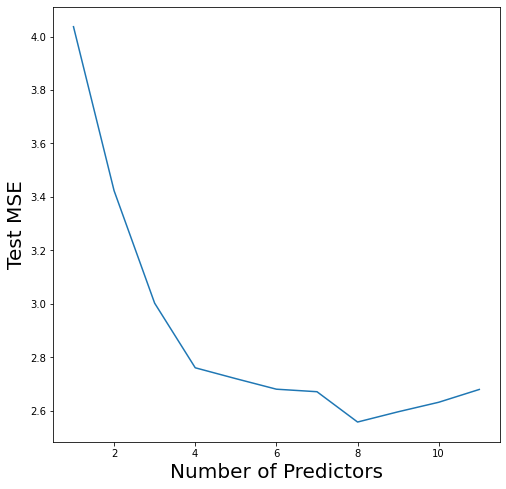

In [157]:
np.random.seed(1)
m = list(range(1, x_train.shape[1]+1))
mse = []
for n in range(1, x_train.shape[1]+1):
    bag = RFR(max_features=n, random_state=0)
    bag.fit(x_train, y_train)
    test_pred = bag.predict(x_test)
    mse1 = (np.mean((y_test['Sales'] - test_pred)**2))
    mse.append(mse1)
ax = subplots(figsize=(8,8))[1]
ax.plot(m, mse)
ax.set_xlabel('Number of Predictors', fontsize=20) 
ax.set_ylabel('Test MSE', fontsize=20)

In [158]:
np.sqrt(x_train.shape[1])

3.3166247903554

In [159]:
np.random.seed(1)
bag = RFR(max_features=3, random_state=0)
bag.fit(x_train, y_train)
test_pred = bag.predict(x_test)
mse = (np.mean((y_test['Sales'] - test_pred)**2))
print('Test MSE: '+ str(mse))
feature_imp = pd.DataFrame( {'importance':bag.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

Test MSE: 3.0026211910833323


,importance
Price,0.249693
ShelveLoc[Good],0.166921
CompPrice,0.103150
Age,0.100731
Advertising,0.093528
Income,0.088623
Population,0.082494
Education,0.053251
ShelveLoc[Medium],0.034651
US[Yes],0.014007


#### (d)

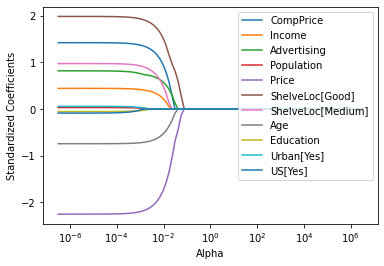

In [162]:
np.random.seed(1)
alphas = 20**np.linspace(5,-5,100)
coefs = pd.DataFrame(columns=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc[Good]', 'ShelveLoc[Medium]', 'Age', 'Education',
       'Urban[Yes]', 'US[Yes]', 'alpha'])
x1 = x.copy()
x_scale = StandardScaler().fit(x1)
lasso = Lasso(normalize = True)
i = 0
for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(x_scale.transform(x1), y)
    coefs.loc[i] = np.append(lasso.coef_, alpha)
    i += 1
ax = plt.gca()
ax.plot(alphas, coefs['CompPrice'], label = 'CompPrice')
ax.plot(alphas, coefs['Income'], label = 'Income')
ax.plot(alphas, coefs['Advertising'], label = 'Advertising')
ax.plot(alphas, coefs['Population'], label = 'Population')
ax.plot(alphas, coefs['Price'], label = 'Price')
ax.plot(alphas, coefs['ShelveLoc[Good]'], label = 'ShelveLoc[Good]')
ax.plot(alphas, coefs['ShelveLoc[Medium]'], label = 'ShelveLoc[Medium]')
ax.plot(alphas, coefs['Age'], label = 'Age')
ax.plot(alphas, coefs['Education'], label = 'Education')
ax.plot(alphas, coefs['Urban[Yes]'], label = 'Urban[Yes]')
ax.plot(alphas, coefs['US[Yes]'], label = 'US[Yes]')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='upper right')
plt.show()